In [2]:
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
#from generator import DataGenerator
import keras
from keras.callbacks import ModelCheckpoint
import os


In [7]:
# Data augmentation
train_dir = '../input/kermany2018/OCT2017 /train'
ImageSize = 224
batch_size=128
imageDelegate = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.1
    )

train_generator = imageDelegate.flow_from_directory(
    train_dir,
    target_size=(ImageSize , ImageSize),
    batch_size=batch_size,
    subset='training'
)
train_x, train_y = next(train_generator)

val_generator =imageDelegate.flow_from_directory(
    train_dir,
    target_size=(ImageSize , ImageSize),
    batch_size=batch_size,
    subset='validation'
)
valid_X, valid_Y = next(val_generator)



Found 75138 images belonging to 4 classes.
Found 8346 images belonging to 4 classes.


In [8]:
# Defining ResNet model
def resnet_model():
    img_in = Input(train_x.shape[1:])    #input of model 
    
    model = ResNet50(
                include_top= False ,     # remove  the 3 fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= train_x.shape[1:],
                pooling ='avg') 
    x = model.output  
   
    predictions = Dense(4, activation="softmax", name="predictions")(x)    # fuly connected layer for predict class 
   
    model = Model(inputs=img_in, outputs=predictions)
    
    return model

In [ ]:
# model running methode
# https://keras.io/api/models/model_training_apis/

In [9]:
# compiling model
model = resnet_model()
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
import tensorflow as tf
# creating checkpoint
filepath="./weights.best.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True, 
                             mode='max')
#callbacks_list = [checkpoint]

In [11]:
# Train the network
history = model.fit(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs =30, 
                              callbacks=[checkpoint],
                              verbose=1
                              )


Epoch 1/30
587/587 [==============================] - 766s 1s/step - loss: 0.3346 - accuracy: 0.8926 - val_loss: 9.0261 - val_accuracy: 0.4919

Epoch 00001: val_accuracy improved from -inf to 0.49195, saving model to ./weights.best.hdf5
Epoch 2/30
587/587 [==============================] - 495s 843ms/step - loss: 0.1442 - accuracy: 0.9523 - val_loss: 0.5778 - val_accuracy: 0.8245

Epoch 00002: val_accuracy improved from 0.49195 to 0.82452, saving model to ./weights.best.hdf5
Epoch 3/30
587/587 [==============================] - 496s 844ms/step - loss: 0.1397 - accuracy: 0.9528 - val_loss: 0.2427 - val_accuracy: 0.9248

Epoch 00003: val_accuracy improved from 0.82452 to 0.92476, saving model to ./weights.best.hdf5
Epoch 4/30
587/587 [==============================] - 489s 833ms/step - loss: 0.1077 - accuracy: 0.9641 - val_loss: 0.2885 - val_accuracy: 0.9141

Epoch 00004: val_accuracy did not improve from 0.92476
Epoch 5/30
587/587 [==============================] - 489s 831ms/step - los

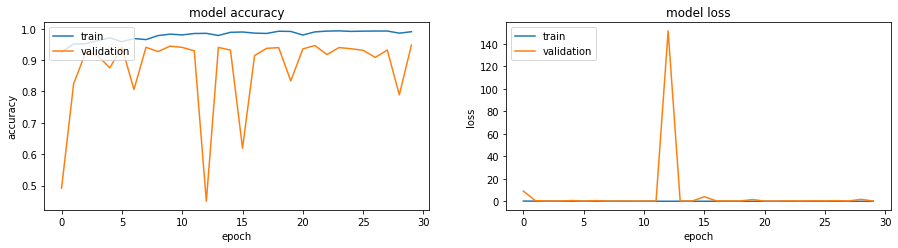

In [12]:
plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

# summarize history for loss
plt.subplot(5,5,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [13]:
# loading the model with best weight
#model = resnet_model()
# filepath="./weights.best.hdf5"

model.load_weights(filepath)

In [14]:
# creating test data
test_dir = '../input/kermany2018/OCT2017 /test'

test_generator = imageDelegate.flow_from_directory(
    test_dir,
    target_size=(ImageSize , ImageSize),
    batch_size=16, 
)

test_X, test_Y = next(test_generator)

# add all test image in 1 array
tstX=[]
tstY=[]
tX=[]
tY=[]

for i in range(len(test_generator)):
    test_X, test_Y = next(test_generator)
    tstX.append(test_X)
    tstY.append(test_Y)


for j in range(len(tstX)):
  for x in tstX[j]:
      tX.append(x)
  for x in tstY[j]:
      tY.append(x)



Found 968 images belonging to 4 classes.


In [15]:
# evaluate
model.evaluate(test_generator)



61/61 [==============================] - 4s 67ms/step - loss: 0.0097 - accuracy: 0.9969


[0.00972294993698597, 0.9969007968902588]

In [16]:
# predicting y value
import numpy as np

y_pred = model.predict( np.asarray(tX))


pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

actual_class = []
for i in range(len(tY)):
    actual_class.append(np.argmax( np.asarray(tY[i])))    

# accuracy score
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(pred_class,actual_class))     


accuracy =  0.996900826446281


accuracy =  0.996900826446281


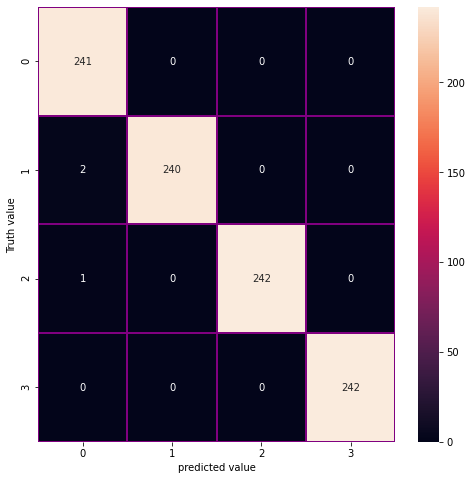

In [26]:
# predicting y value
import numpy as np

y_pred = model.predict( np.asarray(tX))


pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

actual_class = []
for i in range(len(tY)):
    actual_class.append(np.argmax( np.asarray(tY[i])))    

# accuracy score
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(pred_class,actual_class))
cm = sklearn.metrics.confusion_matrix(actual_class, pred_class)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

NameError: name 'itertools' is not defined

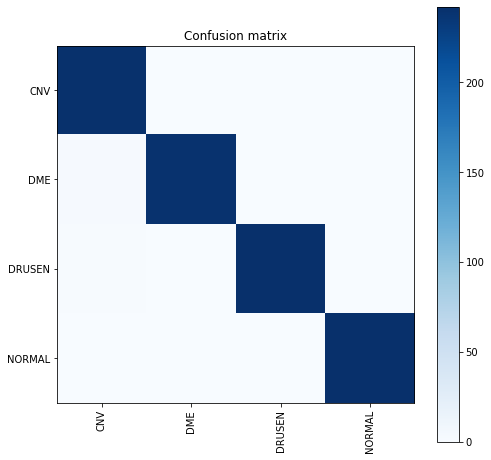

In [18]:
import sklearn.metrics
import seaborn as sns
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = sklearn.metrics.confusion_matrix(actual_class, pred_class)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
#sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [20]:
class_labels = list(test_generator.class_indices.keys())

report = sklearn.metrics.classification_report(actual_class, pred_class, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

         CNV       0.99      1.00      0.99       241
         DME       1.00      0.99      1.00       242
      DRUSEN       1.00      1.00      1.00       243
      NORMAL       1.00      1.00      1.00       242

    accuracy                           1.00       968
   macro avg       1.00      1.00      1.00       968
weighted avg       1.00      1.00      1.00       968



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()

NameError: name 'Y_test' is not defined

In [22]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report

In [19]:
model.save('/kaggle/working/weights1.hdf5')
